In [ ]:
# Develop plots for the publication


In [63]:
"""
Plotting module for PyTorch prototyping

:author: Julian M. Kleber
"""
from typing import Type, Optional, Dict, Any, List

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import ChainMap


def plot_range_band(result: List[Dict[str, float]], key_val: str) -> None:
    
    max_val = []
    min_val = []
    avg_val = []

    arr_res = np.zeros((len(result), len(result[0][key_val])))
    print(arr_res.shape)
    for i, res in enumerate(result):
        arr_res[i, :] = res[key_val]
        
    for i in range(arr_res.shape[1]): 
        
        max_val.append(get_min(arr_res[:, i]))
        min_val.append(get_max(arr_res[:, i]))
        avg_val.append(get_avg(arr_res[:, i]))
    for i, res in enumerate(result):
        fig, ax = plt.subplots()
        ax.plot(arr_res[i,:], '-')
        #ax.fill_between(min_val, max_val, alpha=0.2)

def get_stacked_list(
    path_to_directory: str, column_name: str, num_cv: int, json_name: str
) -> List[Dict[str, float]]:

    results = []

    for i in range(num_cv):
        print(f"Attempting cv {i}")
        
        result = parse_acc_list_json(
                path_to_json=path_to_directory + f"CV_{i}/" + json_name
            )
        results.append(result)
        print(f"parsed results for CV {i}")

    return results


def parse_old_file_format_for_plot(stacked_list: List[float]) -> List[List[float]]:
    """
    The parse_old_file_format_for_plot function takes in a path to a json file and returns the following:

    :param path_to_json:str: Used to Specify the path to the json file that we want to parse.
    :return: A list of dictionaries.

    :doc-author: Julian M. Kleber
    """

    result_acc = parse_acc_list_json(path_to_json=path_to_json)
    train_frames_acc = parse_min_max_avg(result_acc["Train_acc"])
    test_frames_acc = parse_min_max_avg(result_acc["Test_acc"])
    return train_frames_acc, test_frames_acc


def parse_acc_list_json(path_to_json: str) -> Dict[str, Any]:
    """
    The parse_acc_list_json function takes in a path to a json file and returns the contents of that json file as a dictionary.
    The function also parses the "Acc" key in the dictionary, which contains lists of tuples containing train and test accuracy values.
    The function then separates these tuples into two separate lists, one for train accuracy values and one for test accuracy values.
    These new lists are added to the original dictionary under keys "Acc_train" and "Acc_val", respectively.

    :param path_to_json:str: Used to Specify the path to the json file.
    :return: A dictionary with the following keys:.

    :doc-author: Trelent
    """

    result = load_json_from_file(path_to_json)
    return result



def parse_acc_list_json_old_format(path_to_json: str) -> Dict[str, Any]:
    """
    The parse_acc_list_json function takes in a path to a json file and returns the contents of that json file as a dictionary.
    The function also parses the "Acc" key in the dictionary, which contains lists of tuples containing train and test accuracy values.
    The function then separates these tuples into two separate lists, one for train accuracy values and one for test accuracy values.
    These new lists are added to the original dictionary under keys "Acc_train" and "Acc_val", respectively.

    :param path_to_json:str: Used to Specify the path to the json file.
    :return: A dictionary with the following keys:.

    :doc-author: Trelent
    """

    result = load_json_from_file(path_to_json)
    acc_store = result["Acc"]
    print(len(acc_store))
    train_acc = []
    test_acc = []

    for i in range(len(acc_store)):
        train, test = acc_store[i]
        train_acc.append(train)
        test_acc.append(test)

    del result["Acc"]
    print(f"Len of train, {len(train_acc)}")
    result["Acc_train"] = train_acc
    result["Acc_val"] = test_acc

    return result


def parse_min_max_avg(result_list: List[List[float]]) -> List[float]:
    """
    The parse_min function takes a list of lists and returns the minimum value for each sublist.

    :param result_list:List[List[float]]: Used to Store the results of the simulation.
    :return: A list of the minimum values for each step.

    :doc-author: Trelent
    """

    minima = []
    maxima = []
    averages = []
    for i in range(len(result_list[0])):

        step_list = result_list[:, i]
        minimum = get_min(step_list=step_list)
        maximum = get_max(step_list=step_list)
        average = get_avg(step_list=step_list)
        minima.append(minimum)
        maxima.append(maximum)
        averages.append(average)
    return [minima, maxima, averages]


def get_avg(step_list: List[float]) -> float:
    """
    The get_avg function takes a list of floats and returns the average value.


    :param step_list:List[float]: Used to Tell the function that it will be taking a list of floats as an argument.
    :return: The mean of the step_list.

    :doc-author: Julian M. Kleber
    """

    return np.mean(step_list)


def get_max(step_list: List[float]) -> float:
    """
    The get_max function takes a list of floats and returns the maximum value in that list.


    :param step_list:List[float]: Used to Tell the function that step_list is a list of floats.
    :return: The maximum value in the list.

    :doc-author: Trelent
    """

    return np.max(step_list)


def get_min(step_list: List[float]) -> float:
    """
    The get_min function takes a list of floats and returns the minimum value in that list.

    :param step_list:List[float]: Used to Specify the type of parameter that is being passed into the function.
    :return: The minimum value in the step_list.

    :doc-author: Trelent
    """

    return np.min(step_list)





Attempting cv 0
parsed results for CV 0
Attempting cv 1
parsed results for CV 1
Attempting cv 2
parsed results for CV 2
Attempting cv 3
parsed results for CV 3
Attempting cv 4
parsed results for CV 4
len of results is 5000
dict_keys(['Loss', 'Acc_train', 'Acc_test', 'AUC'])
(5, 5000)


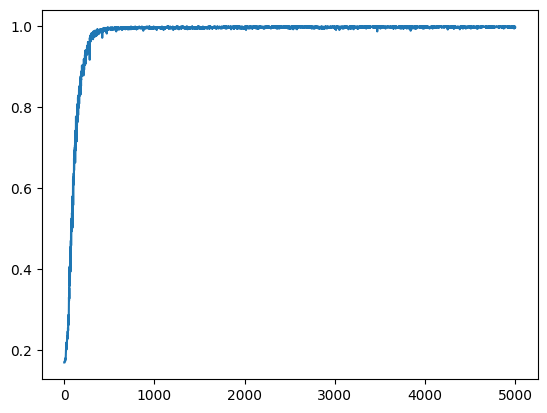

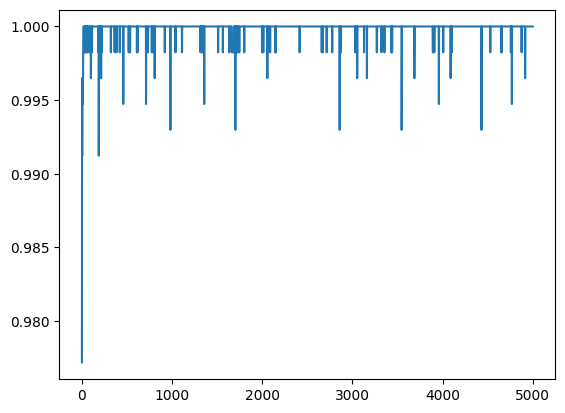

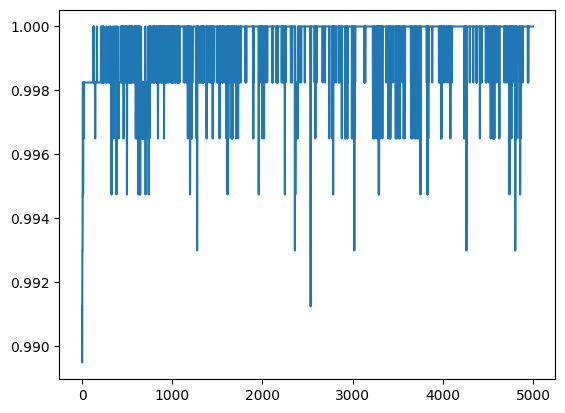

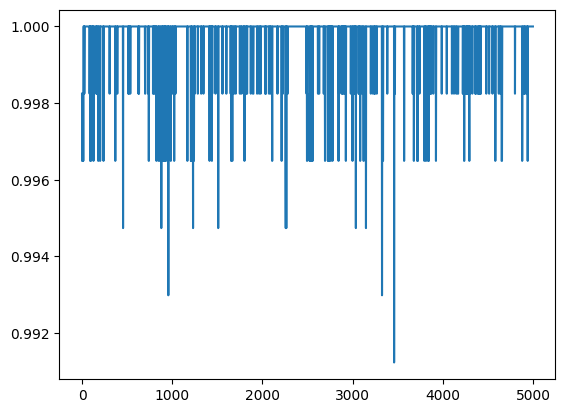

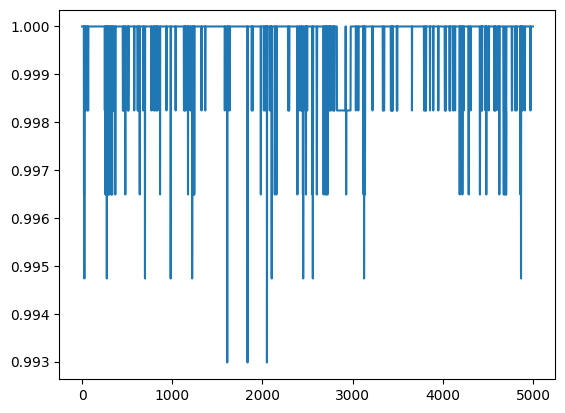

In [64]:
import pandas as pd

path_to_directory = (
        "./ENZYMES_DATA/data/"
    )
result = get_stacked_list(
        path_to_directory=path_to_directory,
        column_name="Acc",
        num_cv=5,
        json_name="ENZYMES.json",
    )
print("len of results is", len(result[0]["Loss"]))
print(result[0].keys())
plot_range_band(result, key_val="Acc_train")